<a href="https://colab.research.google.com/github/Nasser1159/Computer-Vision/blob/main/Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Phase 2**

# Imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Contour Detection**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def find_locator_boxes(img):

    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[1:10]

    locator_boxes = []
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approximation = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

        if len(approximation) == 4:
            (x, y, w, h) = cv2.boundingRect(contour)
            aspect_ratio = w / float(h)
            if 0.8 < aspect_ratio < 1.2 and cv2.contourArea(contour) > 100:
                locator_boxes.append(contour)
    locator_boxes = sorted(locator_boxes, key=cv2.contourArea, reverse=True)[:3]

    arr = []
    output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for box in locator_boxes:
        cv2.drawContours(output_img, [box], -1, (0, 255, 0), 3)
        M = cv2.moments(box)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            arr.append([cx,cy])
            cv2.circle(output_img, (cx, cy), 5, (0, 0, 255), -1)

    if((len(arr) < 3) or (arr[0] == arr[1]) or (arr[0] == arr[2]) or (arr[1] == arr[2])):
      return "false"

    if(arr[2][1] == arr[1][1]):
      if(arr[2][0] != arr[0][0]):
        return "Flipped"
    if(arr[2][0] == arr[0][0]):
        if(arr[0][1] != arr[2][1]):
          if(arr[1][1] == arr[2][1]):
            return "Correct"
          else:
            return "Rotated 180"
    elif(((arr[0][1] - arr[2][1])/(arr[0][0] - arr[2][0])) < 0):
        return "prespective"

    return "damaged"

"""
top left locator box has the same cy with the top right locator box and
the top left locator box has the same cx with the bottom left locator box
"""

'\ntop left locator box has the same cy with the top right locator box and\nthe top left locator box has the same cx with the bottom left locator box\n'

## **Perspective**

In [ ]:
def Perspective(img):
  width , height = 1012,1012
  pts1 = np.float32([[313,195],[980,88],[55,955],[725,855]])
  pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
  matrix = cv2.getPerspectiveTransform(pts1,pts2)
  img = cv2.warpPerspective(img,matrix,(width,height))

  img = cv2.copyMakeBorder(img , 20 , 20 ,20 , 20 , cv2.BORDER_CONSTANT,value=[255,255,255])

  return img

## **Sharpen Image**

In [ ]:
def sharpen_image(image):
  kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  return cv2.filter2D(image,-1,kernel)

## **Check Histogram**

In [ ]:
def check_H(img):

  percentage = []

  hist = cv2.calcHist([img], [0], None, [256], [0,256])
  light_threshold = 200
  darker_threshold = 128

  light_pixels = np.sum(hist[light_threshold+1:])
  dark_pixels = np.sum(hist[:darker_threshold])

  total_pixels = img.size
  Light_percentage = light_pixels / total_pixels * 100

  Dark_percentage = dark_pixels / total_pixels * 100

  percentage = [Light_percentage,Dark_percentage]

  return percentage

## **Preprocessing Each test case alone**

## **Test Case 1**

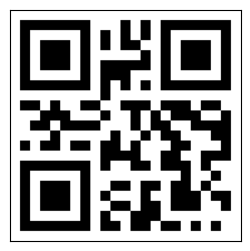

In [ ]:
img_1 = cv2.imread("/content/01-Getting-started.png",cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_1, cmap='gray');

## **Test Case 2 (Not Decoded)**

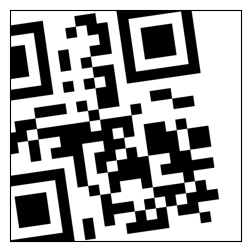

In [ ]:
img_2 = cv2.imread("/content/02-Matsawar-3edel-ya3am.png",cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_2, cmap='gray');

## **Test Case 3**

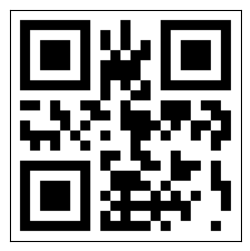

In [ ]:
img_3 = cv2.imread("/content/03-Leffy-bina-ya-donya.png",cv2.IMREAD_GRAYSCALE)

_, img_3 = cv2.threshold(img_3, 128, 255, cv2.THRESH_BINARY)
img_3 = cv2.rotate(img_3, cv2.ROTATE_180)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_3, cmap='gray');

## **Test Case 4**

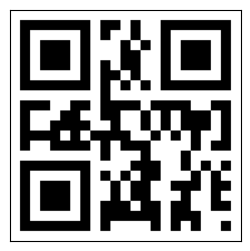

In [ ]:
img_4 = cv2.imread("/content/04-Black-mirror.png",cv2.IMREAD_GRAYSCALE)

img_4 = 255 - img_4
_, img_4 = cv2.threshold(img_4, 200, 255, cv2.THRESH_BINARY)

img_4 = cv2.flip(img_4, 1)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))

"""
img_4 = cv2.equalizeHist(img_4)
_, img_4 = cv2.threshold(img_4, 128, 255, cv2.THRESH_BINARY)
img_4 = sharpen_image(img_4)
img_4 = cv2.dilate(img_4,square_se)
img_4 = cv2.erode(img_4,square_se)
img_4 = cv2.dilate(img_4,square_se)
"""

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_4, cmap='gray');

## **Test Case 5**

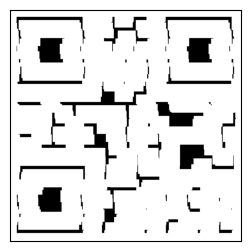

In [ ]:
img_5 = cv2.imread("/content/05-Caesar-cipher.png",cv2.IMREAD_GRAYSCALE)

img_5 = cv2.equalizeHist(img_5)
_, img_5 = cv2.threshold(img_5, 128, 255, cv2.THRESH_BINARY)
img_5 = sharpen_image(img_5)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img_5 = cv2.dilate(img_5,square_se)

square_seee = cv2.getStructuringElement(cv2.MORPH_RECT, (13,13))
img_5 = cv2.dilate(img_5,square_seee)

square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img_5 = cv2.dilate(img_5,square_see)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_5, cmap='gray');

## **Test Case 6**

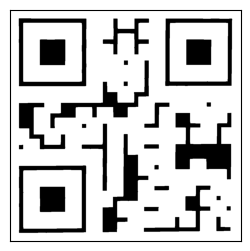

In [ ]:
img_6 = cv2.imread("/content/06-Railfence-cipher.png",cv2.IMREAD_GRAYSCALE)

img_6 = Perspective(img_6)


square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img_6 = cv2.equalizeHist(img_6)
_, img_6 = cv2.threshold(img_6, 128, 255, cv2.THRESH_BINARY)
img_6 = sharpen_image(img_6)
img_6 = cv2.dilate(img_6,square_se)
img_6 = cv2.erode(img_6,square_se)
img_6 = cv2.dilate(img_6,square_se)

square_seee = cv2.getStructuringElement(cv2.MORPH_RECT, (13,13))
img_6 = cv2.dilate(img_6,square_seee)

square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img_6 = cv2.dilate(img_6,square_see)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_6, cmap='gray');

## **Test Case 7 (NOT DECODED)**

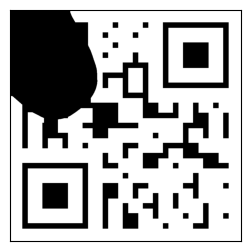

In [ ]:
img_7 = cv2.imread("/content/07-THE-MIGHTY-FINGER.png",cv2.IMREAD_GRAYSCALE)
_, img_7 = cv2.threshold(img_7, 240, 255, cv2.THRESH_BINARY)

square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img_7 = cv2.dilate(img_7,square_see)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_7, cmap='gray');

## **Test Case 8**

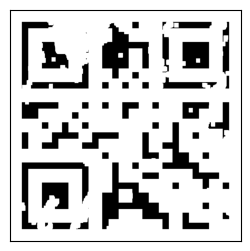

In [ ]:
img_8 = cv2.imread("/content/08-Compresso-Espresso.png",cv2.IMREAD_GRAYSCALE)
_, img_8 = cv2.threshold(img_8, 173, 255, cv2.THRESH_BINARY)

square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))
img_8 = cv2.dilate(img_8,square_see)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_8, cmap='gray');

## **Test Case 9**

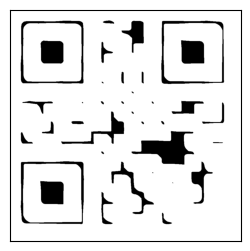

In [ ]:
img_9 = cv2.imread("/content/09-My-phone-fell-while-taking-this-one-...-or-did-it.png",cv2.IMREAD_GRAYSCALE)

img_9 = cv2.equalizeHist(img_9)
_, img_9 = cv2.threshold(img_9, 53, 255, cv2.THRESH_BINARY)
img_9 = sharpen_image(img_9)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img_9 = cv2.dilate(img_9,square_se)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_9, cmap='gray');

## **Test Case 10**

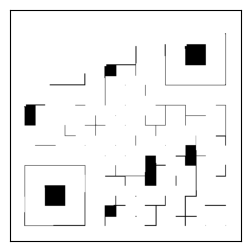

In [ ]:
img_10 = cv2.imread("/content/10-Gone-With-The-Wind.png",cv2.IMREAD_GRAYSCALE)

img_10 = 255 - img_10
_, img_10 = cv2.threshold(img_10, 53, 255, cv2.THRESH_BINARY_INV)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img_10 = cv2.erode(img_10,square_se)
img_10 = cv2.dilate(img_10,square_se)
img_10 = cv2.dilate(img_10,square_se)
img_10 = cv2.erode(img_10,square_se)
img_10 = cv2.dilate(img_10,square_se)
img_10 = cv2.erode(img_10,square_se)
img_10 = cv2.dilate(img_10,square_se)
img_10 = cv2.erode(img_10,square_se)
img_10 = cv2.dilate(img_10,square_se)
img_10 = cv2.dilate(img_10,square_se)
square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img_10 = cv2.dilate(img_10,square_see)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_10, cmap='gray');

## **Test Case 11 (Not Decoded)**

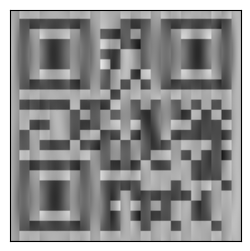

In [ ]:
img_11 = cv2.imread("/content/11-weewooweewooweewoo.png",cv2.IMREAD_GRAYSCALE)

fourier_transform = np.fft.fft2(img_11)
center_shift = np.fft.fftshift(fourier_transform)

rows, cols = img_11.shape
crow, ccol = rows // 2, cols // 2

# horizontal mask
center_shift[crow - 4:crow + 4, 0:ccol - 10] = 1
center_shift[crow - 4:crow + 4, ccol + 10:] = 1

f_shift = np.fft.ifftshift(center_shift)
denoised_image = np.fft.ifft2(f_shift)
denoised_image = np.real(denoised_image)


denoised_image = cv2.convertScaleAbs(denoised_image)
denoised_image = cv2.cvtColor(denoised_image, cv2.COLOR_GRAY2BGR)


fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(denoised_image, cmap='gray');

## **Test Case 12**

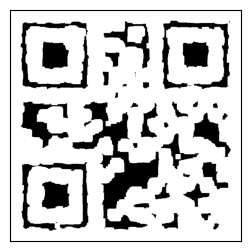

In [ ]:
img_12 = cv2.imread("/content/12-mal7-w-felfel.png",cv2.IMREAD_GRAYSCALE)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img_12 = cv2.medianBlur(img_12,27)
img_12 = cv2.equalizeHist(img_12)
_, img_12 = cv2.threshold(img_12, 128, 255, cv2.THRESH_BINARY)
img_12 = sharpen_image(img_12)
img_12 = cv2.dilate(img_12,square_se)
img_12 = cv2.erode(img_12,square_se)
img_12 = cv2.dilate(img_12,square_se)
square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img_12 = cv2.dilate(img_12,square_see)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_12, cmap='gray');

## **Test Case 13**

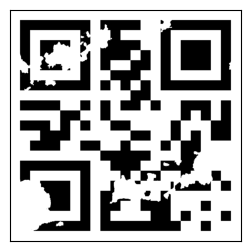

In [ ]:
img_13 = cv2.imread("/content/13-2el-noor-2ata3.png",cv2.IMREAD_GRAYSCALE)

img_13 = cv2.equalizeHist(img_13)
_, img_13 = cv2.threshold(img_13, 128, 255, cv2.THRESH_BINARY)


fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_13, cmap='gray');

## **Test Case 14 (Not Decoded)**

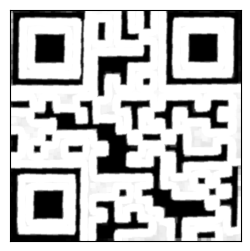

In [ ]:
img_14 = cv2.imread("/content/14-BANANAAA!!!.png", cv2.IMREAD_GRAYSCALE)

img_14 = sharpen_image(img_14)
img_14 = sharpen_image(img_14)
width , height = 1012,1012
pts1 = np.float32([[575,563],[694,518],[621,679],[738,636]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
img_14 = cv2.warpPerspective(img_14,matrix,(width,height))

square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img_14 = cv2.dilate(img_14,square_see)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_14, cmap='gray');

## Preprocessing , Generic for 1 , 3 , 4 , 5 , 6 , 8 , 9 , 10

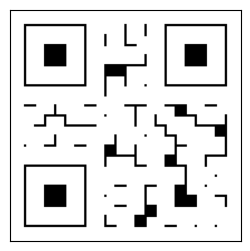

In [ ]:
#Generalize

img3 = cv2.imread("/content/01-Getting-started.png",cv2.IMREAD_GRAYSCALE)

if(find_locator_boxes(img3) == "Flipped"):
    img3 = cv2.flip(img3, 1)
elif(find_locator_boxes(img3) == "Rotated 180"):
  img3 = cv2.rotate(img3, cv2.ROTATE_180)
elif(find_locator_boxes(img3) == "prespective"):
  img3 = Perspective(img3)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))

if(check_H(img3)[1] > 50):
  img3 = 255 - img3
  _, img3 = cv2.threshold(img3, 200, 255, cv2.THRESH_BINARY)

if(check_H(img3)[0] < 25):
  _, img3 = cv2.threshold(img3, 53, 255, cv2.THRESH_BINARY)

img3 = cv2.equalizeHist(img3)
_, img3 = cv2.threshold(img3, 128, 255, cv2.THRESH_BINARY)
img3 = sharpen_image(img3)
img3 = cv2.dilate(img3,square_se)
img3 = cv2.erode(img3,square_se)
img3 = cv2.dilate(img3,square_se)

if(check_H(img3)[1] > 21):
  square_seee = cv2.getStructuringElement(cv2.MORPH_RECT, (13,13))
  img3 = cv2.dilate(img3,square_seee)

square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img3 = cv2.dilate(img3,square_see)


fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img3, cmap='gray');

## **Generic 100%**
## **It solves 1 , 3 , 5 , 6 , 8 , 9 , 10**

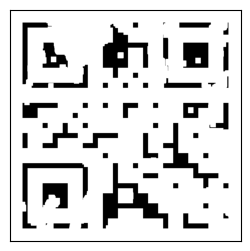

In [ ]:
img3 = cv2.imread("/content/08-Compresso-Espresso.png",cv2.IMREAD_GRAYSCALE)


if(find_locator_boxes(img3) == "Flipped"):
    img3 = cv2.flip(img3, 1)
elif(find_locator_boxes(img3) == "Rotated 180"):
  img3 = cv2.rotate(img3, cv2.ROTATE_180)
elif(find_locator_boxes(img3) == "prespective"):
  img3 = Perspective(img3)

square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))

if(check_H(img3)[0] < 25):
  _, img3 = cv2.threshold(img3, 53, 255, cv2.THRESH_BINARY)

img3 = cv2.equalizeHist(img3)
_, img3 = cv2.threshold(img3, 128, 255, cv2.THRESH_BINARY)
img3 = sharpen_image(img3)
img3 = cv2.dilate(img3,square_se)
img3 = cv2.erode(img3,square_se)
img3 = cv2.dilate(img3,square_se)

#This if statement is not generic 100% but it solves test case 10
if(check_H(img3)[1] > 21):
  square_seee = cv2.getStructuringElement(cv2.MORPH_RECT, (13,13))
  img3 = cv2.dilate(img3,square_seee)

square_see = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img3 = cv2.dilate(img3,square_see)

img_generic = img3

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_generic, cmap='gray');

## **Decoding**

(21, 21)


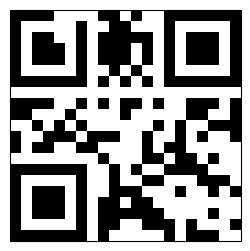

In [ ]:
#Choose which image to decode
img3 = img_8

start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img3):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img3[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img3.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img3)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img3)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img3.shape[1] - col_index
            break
    if end_col != -1:
        break

img3_no_quiet_zone = img3[start_row:end_row, start_col:end_col]

# Alternative method to get the grid directly
# I directly resize it to 21x21 and use something like the replacement downscaling geometric transformation
# So for each collection of pixels, only one pixel survives, and since this is a perfect test case, it works
# In non-perfect test cases, you'd have needed to do some more steps to ensure correct replacement is done
img3_21x21_grid = cv2.resize(img3_no_quiet_zone, (21, 21), interpolation=cv2.INTER_AREA) // 255

# Assuming img3_no_quiet_zone is a previously defined image
#img3_21x21_grid = cv2.resize(img3_no_quiet_zone, (21, 21), interpolation=cv2.INTER_AREA)

# Convert the image data to float and normalize it to range 0-1
#img3_21x21_grid = img3_21x21_grid.astype(float) / 255.0
#_, img3_21x21_grid = cv2.threshold(img3_21x21_grid, 128, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img3_21x21_grid, cmap='gray');
print(img3_21x21_grid.shape)

This time I will invert the entire grid before proceeding, to abide by the QR Code's convention of setting black cells to 1 and white to 0.

In [ ]:
img3_21x21_grid_inv = 1 - img3_21x21_grid

print(img3_21x21_grid_inv)

[[1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1]
 [1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]
 [0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1]
 [1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1]
 [1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0]
 [1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0]
 [1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0]]


## QR Format Extraction

In [ ]:
#ecl = img3_21x21_grid_inv[8, 0:2]
#mask = img3_21x21_grid_inv[8, 2:5]

ecl = img3_21x21_grid_inv[19:21, 8]  # Bottom left, moving diagonally upward to the right

mask = [img3_21x21_grid_inv[18, 8], img3_21x21_grid_inv[17, 8], img3_21x21_grid_inv[16, 8]]

# I don't care about FEC because I know this is a perfect test case
# However, you! should care (the FEC is what tells you whether the format bits are correct or not)
# I will leave it up to you to check for their correctness via decoding or a lookup table
# Since this time I won't demonstrate the FEC concept, I don't need to apply the FEC mask
# Thus, these are our ECL and MASK values:
print(ecl, mask)
# Remember, regarding the ECL value, we choose from the following:
# Level L (Low)         [11]	7%  of data bytes can be restored.
# Level M (Medium)      [10]	15% of data bytes can be restored.
# Level Q (Quartile)    [01]	25% of data bytes can be restored.
# Level H (High)        [00]	30% of data bytes can be restored.

[1 1] [1, 1, 0]


## Data Extraction

In [ ]:
# Dictionary of all masks and their equivalent formulae
# P.S. I modified them to account for that I skipped the FEC mask part above
# If you will do it, do not XOR the mask if you wish to use this MASKS table
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i // 2 + j // 3) % 2 == 0,
    "010": lambda i, j: ((i + j) % 2 + (i * j) % 3) % 2 == 0,
    "011": lambda i, j: ((i * j) % 2 + (i * j) % 3) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}
# Enum for the different directions of reading blocks in the QR code
# The number indicates how many bytes are in this block
UP8, UP4, DOWN8, DOWN4, CW8, CCW8 = range(6)

In [ ]:
# A more general apply_mask function (still works the same way)
def apply_mask_general(data_start_i, data_start_j, data, mask, direction):
    result = []
    row_offsets = []
    col_offsets = []
    mask_str = ''.join([str(c) for c in mask])
    if (direction in [UP8, UP4]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction in [DOWN8, DOWN4]):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW8):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW8):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    for i, j in zip(row_offsets, col_offsets):
        cell_bit = bool(data[data_start_i+i, data_start_j+j])
        mask_bit = MASKS[mask_str](data_start_i+i, data_start_j+j)
        # Modules corresponding to the dark areas of the mask are inverted.
        result.append(int(not cell_bit if mask_bit else cell_bit))
    return result[:4] if direction in [UP4, DOWN4] else result

In [ ]:
enc_bits = apply_mask_general(21-1, 21-1, img3_21x21_grid_inv, mask, UP8)[:4]
print(enc_bits)
# 0001	Numeric encoding (10 bits per 3 digits)
# 0010	Alphanumeric encoding (11 bits per 2 characters)
# 0100	Byte encoding (8 bits per character)
# 1000	Kanji encoding (13 bits per character)
# ...

[0, 1, 0, 0]


In [ ]:
len_bits = apply_mask_general(21-3, 21-1, img3_21x21_grid_inv, mask, UP8)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')

[0, 0, 0, 1, 0, 0, 0, 1] = 17 data symbols, each consisting of 8 bits


In [ ]:
block_starting_indices = [
    [21-7,  21-1,  UP8],
    [21-11, 21-1,  CCW8],
    [21-10, 21-3,  DOWN8],
    [21-6,  21-3,  DOWN8],
    [21-2,  21-3,  CW8],
    [21-3,  21-5,  UP8],
    [21-7,  21-5,  UP8],
    [21-11, 21-5,  CCW8],
    [21-10, 21-7,  DOWN8],
    [21-6,  21-7,  DOWN8],
    [21-2,  21-7,  CW8],
    [21-3,  21-9,  UP8],
    [21-7,  21-9,  UP8],
    [21-11, 21-9,  UP8],
    [21-16, 21-9,  UP8],
    [21-20, 21-9,  CCW8],
    [21-19, 21-11, DOWN8],
    [21-14, 21-11, DOWN4],  # Special 4-byte block, reserved for END (if exists!)
    [21-12, 21-11, DOWN8],
    [21-8,  21-11, DOWN8],
    [21-4,  21-11, DOWN8],
    [21-9,  21-13, UP8],
    [21-12, 21-16, DOWN8],
    [21-9,  21-18, UP8],
    [21-12, 21-20, DOWN8],
]

In [ ]:
message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
# Let me re-format this for better readability :)
# First, let's read the data bytes, starting from the very first byte after enc and len
byte_index = 0
string = ""
for _ in range(len_int):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, img3_21x21_grid_inv, mask, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1
    if ord(alpha_char) == 0:
      break
    if ord(alpha_char) < 161:
      string = string + alpha_char

print("\nThe decoded string is: " + string)

01100011 (=099) = c
01101111 (=111) = o
01101101 (=109) = m
01110000 (=112) = p
01110010 (=114) = r
01100101 (=101) = e
01110011 (=115) = s
01110011 (=115) = s
01101111 (=111) = o
01100101 (=101) = e
01110011 (=115) = s
01110000 (=112) = p
01110010 (=114) = r
01100101 (=101) = e
01110011 (=115) = s
01110011 (=115) = s
01101111 (=111) = o

The decoded string is: compressoespresso
